<a href="https://colab.research.google.com/github/kavya05-cell/Placement-Prediction/blob/main/Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Steps:**
1.   Preprocess + EDA + Feature Selection
2.   Extract input and output cols
3.   Scale the values


1.   Train-Test split
2.   Train the model


1.   Evaluate the model/ model selection
2.   Deploy the model









In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/modified_placement_data.csv')


Step 1

In [ ]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       95 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
df.shape

(100, 3)

In [ ]:
df.dtypes

,0
cgpa,object
iq,float64
placement,object


In [ ]:
df['cgpa'] = df['cgpa'].astype(str).str.replace(',', '.').astype(float)
df['iq'] = df['iq'].astype(int)
display(df.dtypes)

,0
cgpa,float64
iq,int64
placement,object


In [ ]:
import matplotlib.pyplot as plt

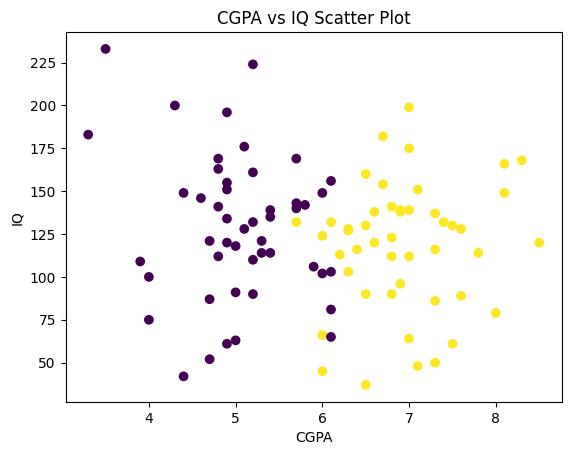

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'].apply(lambda x: 0 if x == 'No' else 1))
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('CGPA vs IQ Scatter Plot')
plt.show()

Step 2

In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
y

,placement
0,Yes
1,No
2,No
3,Yes
4,No
...,...
95,No
96,No
97,Yes
98,Yes


Step 4

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
21,7.1,151
46,5.3,114
12,5.4,139
53,8.3,168
83,7.5,130
...,...,...
98,6.3,103
94,4.7,52
36,5.7,140
63,6.3,128


In [ ]:
y_train

,placement
21,Yes
46,No
12,No
53,Yes
83,Yes
...,...
98,Yes
94,No
36,No
63,Yes


Step 3


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

Transform pehle samjhega fir transform karega

In [ ]:
x_train=scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 0.95822363,  0.63700271],
       [-0.59978078, -0.29663243],
       [-0.51322498,  0.33420213],
       [ 1.99689324,  1.06597021],
       [ 1.30444683,  0.10710169],
       [ 0.00610982, -0.0442986 ],
       [-1.37878299,  0.58653595],
       [ 1.39100264, -0.92746698],
       [ 0.61200043,  1.41923756],
       [ 1.13133523, -1.91156888],
       [-1.37878299, -2.11343594],
       [-0.59978078, -0.11999875],
       [ 0.87166783,  0.33420213],
       [-1.7250062 , -1.28073433],
       [ 0.09266562, -0.57419963],
       [-1.03255979,  1.09120359],
       [-0.77289239,  0.05663492],
       [ 0.26577722,  0.03140154],
       [        nan, -0.4732661 ],
       [-2.3308968 ,  1.44447094],
       [ 0.17922142, -0.32186581],
       [ 0.35233302, -0.24616566],
       [ 0.61200043,  0.71270286],
       [ 0.69855623,  0.38466889],
       [-0.94600399,  1.77250491],
       [ 0.52544463, -0.14523213],
       [ 0.00610982, -1.50783477],
       [-1.20567139,  0.5108358 ],
       [ 0.69855623,

In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[-0.68633659, -0.39756595],
       [ 1.30444683, -1.63400168],
       [ 0.78511203,  0.33420213],
       [ 0.52544463,  0.30896875],
       [ 0.43888883, -2.23960285],
       [ 1.13133523, -0.24616566],
       [-1.811562  , -0.42279934],
       [-0.51322498,  0.2332686 ],
       [-0.68633659,  0.15756845],
       [-0.85944819, -1.58353492]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

MODEL TRAINING

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

clf.fit(x_train,y_train)

LogisticRegression()

Step 6

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
y_test

,placement
92,No
44,Yes
60,Yes
48,Yes
82,Yes
72,Yes
31,No
49,No
19,No
7,No


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

TypeError: can only concatenate str (not "int") to str

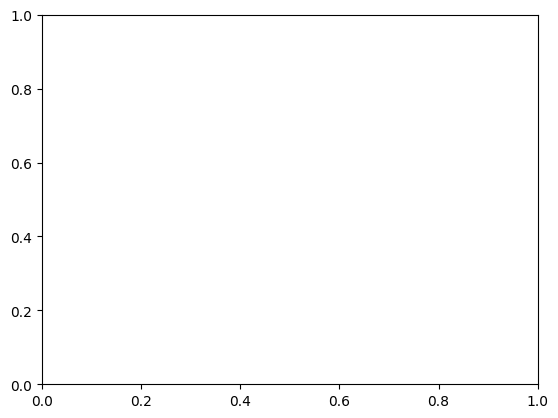

In [ ]:


plot_decision_regions(x_train, y_train_numeric.values, clf=clf, legend=2)

### Plotting Decision Regions with Matplotlib

Since `mlxtend.plotting.plot_decision_regions` is causing issues, we can manually plot the decision boundary using Matplotlib.

  above one is not working so used matplotlib

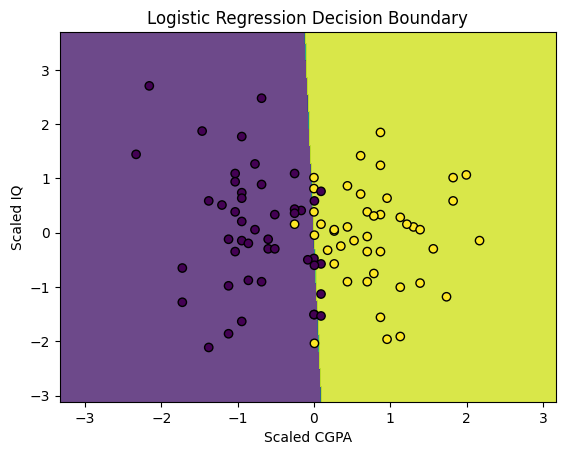

In [ ]:
# Convert y_train and y_test back to numpy arrays for plotting if they are not already
# Ensure they are integer type as required for contour plotting
y_train_numeric = y_train.map({'No': 0, 'Yes': 1}).values.astype(int)
y_test_numeric = y_test.map({'No': 0, 'Yes': 1}).values.astype(int)

# Define the range of the plot
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Map predicted labels back to numeric for plotting contours
Z_numeric = np.array([0 if label == 'No' else 1 for label in Z.ravel()]).reshape(xx.shape)

# Plot the contour lines and filled regions
plt.contourf(xx, yy, Z_numeric, alpha=0.8)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train_numeric, edgecolors='k', marker='o')

plt.xlabel('Scaled CGPA')
plt.ylabel('Scaled IQ')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))